In [15]:
from DLtools.Data import instant_data,station_sel
from DLtools.feature_sel import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Loading Data 

In [16]:
###### SETTING AREA ################
loading = instant_data()
df,mode = loading.hourly_instant(),'hour'
# df,mode = loading.daily_instant(),'day'
if mode =='hour': n_past,n_future = 24*7,72
elif mode =='day': n_past,n_future = 60,30

st = 'CPY012'
target,start_p,stop_p,host_path=station_sel(st,mode)

save_path = host_path

<AxesSubplot:xlabel='date'>

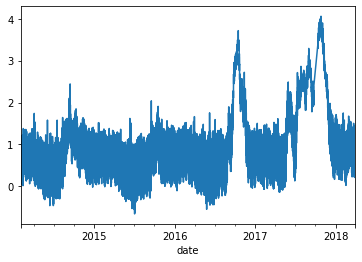

In [17]:
df = df[start_p:stop_p]
data = df

data['Day'] = data.index.dayofyear #add day
data = data.interpolate(limit=300000000,limit_direction='both').astype('float32')#interpolate neighbor first, for rest NA fill with mean() #.apply(lambda x: x.fillna(x.mean()),axis=0)
data[target].plot()


In [18]:
data = call_mar(data,target,mode,cutoff=0.2)

# Check Corr

<AxesSubplot:>

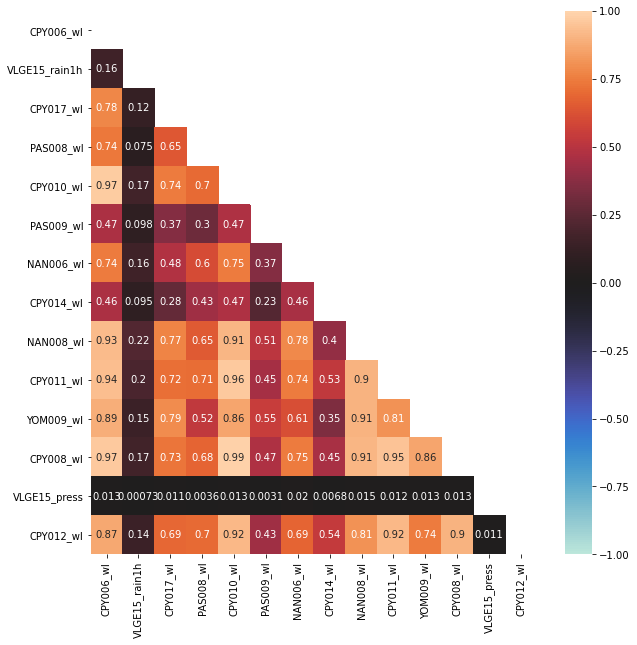

In [19]:
plt.subplots(figsize=(10,10))
mask = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0,mask=mask)

# PCA analysis

In [20]:
x = data.drop([target],axis=1)
x = scale(x)
covar_matrix = PCA(n_components = x.shape[1])
covar_matrix.fit(x.T)

PCA(n_components=13)

In [21]:
print(covar_matrix.components_)
# print(covar_matrix.explained_variance_)


[[ 1.6844528e-03  1.6922563e-03  1.6978316e-03 ... -6.7266898e-04
   5.7870159e-03  1.1751290e-03]
 [-8.5521839e-04 -8.2686316e-04 -7.9461496e-04 ... -2.6448476e-03
   1.2080143e-02  1.7629586e-03]
 [ 9.5552235e-04  3.4050565e-04 -3.1953945e-04 ...  2.6202989e-03
   1.4126876e-03  2.1713329e-03]
 ...
 [-3.1706761e-03 -2.8895205e-03 -2.5323967e-03 ...  9.7905360e-03
   9.7829644e-03  8.2226498e-03]
 [ 3.7068961e-04  6.3892431e-04  4.3678278e-04 ... -1.5991976e-03
  -6.5237028e-04 -1.5110843e-03]
 [ 3.7329265e-01 -9.9866800e-02  1.6569549e-03 ...  1.5481103e-03
   2.9869207e-05 -1.1757568e-03]]


In [22]:
PC_transform = covar_matrix.transform(x.T)
####################
pc_col = []
for i in range (PC_transform.shape[1]):
  pc_col.append('component_'+str(i+1))
#########################
principalDf = pd.DataFrame(data = PC_transform, columns = pc_col)

finalDf = pd.concat([principalDf, pd.Series(data.columns.T)],axis=1)
finalDf.set_index(0).to_csv('MAR/pca_hour_excludeTarget.csv')
finalDf.set_index(0)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13
0,,,,,,,,,,,,,
CPY006_wl,-57.092796,-7.300082,-3.428874,-16.662451,-6.870488,-5.798584,-17.916697,9.419239,-14.458008,-12.516443,22.761238,-0.637691,0.000023
VLGE15_rain1h,131.041153,148.144516,-9.928354,-42.886616,2.159454,1.202267,-6.652548,1.271608,-1.979022,0.148923,0.289277,0.041084,-0.000047
CPY017_wl,-34.303295,-12.136739,-39.777061,-37.491680,76.706367,-24.908165,47.807804,-30.705465,-0.851384,-1.546315,0.774311,-0.053958,0.000023
PAS008_wl,-22.205456,-21.481211,47.195938,-22.922197,73.139984,78.854431,-17.476513,20.988752,0.511195,3.126237,-3.703304,-0.257506,-0.000029
CPY010_wl,-55.508377,-4.460259,-1.190448,-13.364427,-18.848286,-9.178974,-30.571081,-12.614061,-11.379949,-0.695638,-7.956984,13.395851,0.000027
PAS009_wl,30.469318,10.675073,-76.165672,134.434845,13.422570,29.012070,-8.495383,-7.998703,0.605229,-1.329598,1.079813,0.006808,0.000043
NAN006_wl,-19.143543,1.971639,39.887604,0.884514,-71.666351,58.815796,55.517643,-10.232519,-8.833249,4.965035,1.318131,-0.199841,0.000025
CPY014_wl,39.458080,-0.496798,132.765411,64.199356,18.044168,-55.121723,9.809027,2.601399,0.034639,-2.867620,-0.913615,0.099711,-0.000152
NAN008_wl,-48.402161,6.093010,-22.745014,-11.433383,-24.394119,-3.975975,17.696041,19.434795,33.738602,-17.297209,-5.245300,1.209927,0.000043


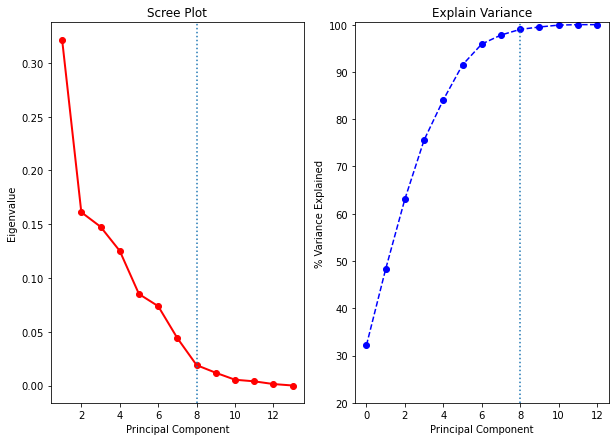

In [23]:
fig,ax = plt.subplots(1,2, figsize=(10,7))
##########################################
PC_values = np.arange(covar_matrix.n_components_) + 1
ax[0].plot(PC_values, covar_matrix.explained_variance_ratio_, 'ro-', linewidth=2)
ax[0].set_title('Scree Plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')


########################################
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
ax[1].set_ylabel('% Variance Explained')
ax[1].set_xlabel('Principal Component')
ax[1].set_title('Explain Variance')
ax[1].set_ylim(20,100.5)
ax[1].plot(var,'--bo')

#####################################
ax[0].axvline(8,linestyle=':')
ax[1].axvline(8,linestyle=':')
plt.savefig('MAR/PCA_analysis_excludeTarget.png', dpi=300, bbox_inches='tight')

In [24]:
# pca = PCA(n_components = 8 )

# split_date = '2017-01-01'
# train,test = data[:split_date],data[split_date:]

# pca.fit(data)
# train_pca = pca.transform(train)
# test_pca = pca.transform(test)